In [2]:
import pip
pip.main(["install","opencv-python"])
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as sm
%matplotlib inline
import tensorflow as tf

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


NumExpr defaulting to 8 threads.


In [3]:
import cv2

In [4]:
import os

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [22]:
img = image.load_img("/Users/mahelwimaladasa/Desktop/BaseData/Test/01 Very Good/Image00001.jpeg")

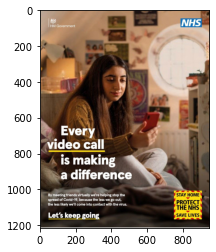

In [9]:
plt.imshow(img)

In [24]:
cv2.imread("/Users/mahelwimaladasa/Desktop/BaseData/Test/01 Very Good/Image00001.jpeg").shape

(1216, 948, 3)

In [13]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [26]:
train_dataset = train.flow_from_directory('/Users/mahelwimaladasa/Desktop/BaseData/Test/',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')
validation_dataset = train.flow_from_directory('/Users/mahelwimaladasa/Desktop/BaseData/Validation/',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')

Found 65 images belonging to 2 classes.
Found 65 images belonging to 2 classes.


In [27]:
train_dataset.class_indices

{'01 Very Good': 0, '04 Very Bad': 1}

In [28]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [29]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                            tf.keras.layers.MaxPool2D(2,2),
                            #
                            tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            #
                            tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            ##
                            tf.keras.layers.Flatten(),
                            ##
                            tf.keras.layers.Dense(512,activation= 'relu'),
                            ##
                            tf.keras.layers.Dense(1,activation= 'sigmoid'),
                            ])

2022-01-30 21:06:27.048161: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [30]:
model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(lr=0.001),
             metrics = ['accuracy'])

/Users/mahelwimaladasa/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [32]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs = 10,
                     validation_data = validation_dataset)

Epoch 1/10
3/3 [==============================] - 4s 1s/step - loss: 3.9886 - accuracy: 0.7778 - val_loss: 2.5480 - val_accuracy: 0.3846
Epoch 2/10
3/3 [==============================] - 2s 791ms/step - loss: 1.5833 - accuracy: 0.4444 - val_loss: 0.7797 - val_accuracy: 0.4154
Epoch 3/10
3/3 [==============================] - 2s 817ms/step - loss: 0.7820 - accuracy: 0.3333 - val_loss: 0.6810 - val_accuracy: 0.5077
Epoch 4/10
3/3 [==============================] - 2s 908ms/step - loss: 0.5447 - accuracy: 0.5556 - val_loss: 0.9287 - val_accuracy: 0.6154
Epoch 5/10
3/3 [==============================] - 2s 963ms/step - loss: 1.2148 - accuracy: 0.2222 - val_loss: 0.6181 - val_accuracy: 0.7077
Epoch 6/10
3/3 [==============================] - 2s 1s/step - loss: 0.5570 - accuracy: 0.7778 - val_loss: 1.1642 - val_accuracy: 0.6154
Epoch 7/10
3/3 [==============================] - 2s 851ms/step - loss: 0.5031 - accuracy: 0.8889 - val_loss: 0.9768 - val_accuracy: 0.6154
Epoch 8/10
3/3 [==========

In [42]:
validation_dataset.class_indices

{'01 Very Good': 0, '04 Very Bad': 1}

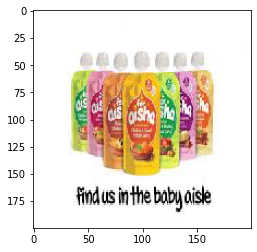

Recreate this Advertisement


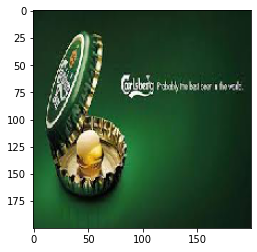

Recreate this Advertisement


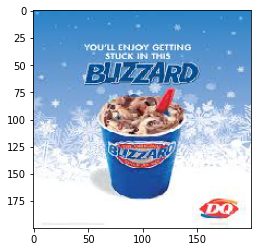

Recreate this Advertisement


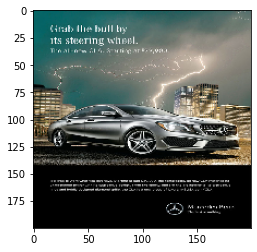

Recreate this Advertisement


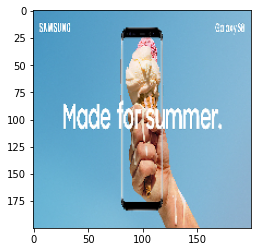

Recreate this Advertisement


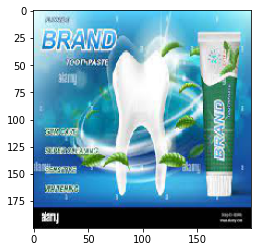

Recreate this Advertisement


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7fc6b1a0de50>

In [47]:
dir_path = '/Users/mahelwimaladasa/Desktop/BaseData/Test/01 Very Good'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis = 0)
    images = np.vstack([X])
    
    val = model.predict(images)
    if val == 0:
        print("Perfect Advertisement")
    else:
        print("Recreate this Advertisement")